# Closest F1 Seasons

According to https://f1experiences.com/blog/formula-1s-closest-championship-battles the closest season were 1976, 1981, 1983, 1984, 1986, 1994, 1999, 2003, 2007, 2008.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
def DriversChamp(year):
    #Function to ouptut and graph desired F1 Season

    #read in file with either file path to csv or raw file url lunk
    url = 'https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/F1EveryRace.csv'
    df=pd.read_csv(url)
    df=df[df['year']==year]

    #Combine names into one full-name
    df['Driver Names'] = df['forename']+' '+df['surname']
    
    #Create Pivot table to graph data from
    races= pd.pivot_table(df,index=['raceId'], columns='Driver Names',values='points')
    races.fillna(0,inplace=True)
    races.insert(0,'Grand Prix',df['name'].unique())
    races.set_index('Grand Prix',inplace=True)

    #Create a copy data frame
    graph=races.copy()
    
    #Creating a rolling sum from race points
    #Each race will add points onto previous sum
    i=1
    while i != len(races.index):
        graph.iloc[i]=graph.iloc[i]+graph.iloc[i-1]
        i=i+1
    graph=graph.astype(int)
    
    #Grab name of last row
    #Last row shows the total sum of all the race points
    name=graph.iloc[[-1]].index[0]
    
    #Sort driver columns by end-of-season points
    graph=graph.sort_values(by=name, ascending=False,axis=1)
    
    #Table of end-of-season points
    EndingPoints=graph.iloc[[-1]].transpose()
    name=graph.iloc[[-1]].index[0]
    EndingPoints.rename({name:f"{year}'s Top 5 Season Finishing Points"},axis=1,inplace=True)
    EndingPoints.columns.name = None
    EndingPoints.sort_values(f"{year}'s Top 5 Season Finishing Points",ascending=False,inplace=True)
    print(EndingPoints.head())

    #Create a list of 9 colors, minus gray
    colors=[]
    for key, value in mcolors.BASE_COLORS.items():
        if key!='tab:gray':
            colors.append(value)
    
    #We are assigning colors to the top 9 drivers in terms of points
    #As well as assigning gray to the other drivers
    #POSSIBLE CHANGE FOR FUTURE: Assign colors to only those competing for championship at last race
    c=[]
    graph.iloc[-1]
    for points in graph.iloc[-1]:
        if points < graph.iloc[-1].nlargest(n=5)[4]:
            c.append('#7f7f7f')
        else:
            c.append(colors.pop(0))
    
    #Graphing
    graph.plot(figsize=(12,12),color=c)

    plt.title(f"{year} Driver's Championship",fontsize=15)
    plt.legend(bbox_to_anchor = (1.05, 1),title='Drivers, in order of points')
    plt.xticks(np.arange(len(graph)),graph.index,rotation=90)
    plt.ylabel('Championship Points')
    plt.margins(x=0)
    plt.grid()
    
    
    plt.savefig('GraphsImages/'+f'{year} Driver Points.jpeg',bbox_inches='tight')
    plt.show()

In [3]:
def ConstructorsChamp(year): 
    url = 'https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/F1EveryRace.csv'
    df=pd.read_csv(url)
    df=df[df['year']==year]

    races= df.pivot_table(index='raceId',columns='Constructor', values='points', aggfunc='sum')
    races.fillna(0,inplace=True)
    races.insert(0,'Grand Prix',df['name'].unique())
    races.set_index('Grand Prix',inplace=True)

    #Create a copy data frame
    graph=races.copy()
    
    #Creating a rolling sum from race points
    #Each race will add points onto previous sum
    i=1
    while i != len(races.index):
        graph.iloc[i]=graph.iloc[i]+graph.iloc[i-1]
        i=i+1
    graph=graph.astype(int)
    
    #Grab name of last row
    #Last row shows the total sum of all the race points
    name=graph.iloc[[-1]].index[0]
    
    #Sort driver columns by end-of-season points
    graph=graph.sort_values(by=name, ascending=False,axis=1)
    
    #Table of end-of-season points
    EndingPoints=graph.iloc[[-1]].transpose()
    name=graph.iloc[[-1]].index[0]
    EndingPoints.rename({name:f"{year}'s Top 5 Season Finishing Points"},axis=1,inplace=True)
    EndingPoints.columns.name = None
    EndingPoints.sort_values(f"{year}'s Top 5 Season Finishing Points",ascending=False,inplace=True)
    print(EndingPoints.head())

    #Create a list of 9 colors, minus gray
    colors=[]
    for key, value in mcolors.BASE_COLORS.items():
        if key!='tab:gray':
            colors.append(value)
    
    #We are assigning colors to the top 9 drivers in terms of points
    #As well as assigning gray to the other drivers
    #POSSIBLE CHANGE FOR FUTURE: Assign colors to only those competing for championship at last race
    c=[]
    graph.iloc[-1]
    for points in graph.iloc[-1]:
        if points < graph.iloc[-1].nlargest(n=5)[4]:
            c.append('#7f7f7f')
        else:
            c.append(colors.pop(0))
    
    #Graphing
    graph.plot(figsize=(12,12),color=c)

    plt.title(f"{year} Constructors's Championship",fontsize=15)
    plt.legend(bbox_to_anchor = (1.05, 1),title='Constructors, in order of points')
    plt.xticks(np.arange(len(graph)),graph.index,rotation=90)
    plt.ylabel('Championship Points')
    plt.margins(x=0)
    plt.grid()

    plt.savefig('GraphsImages/'+f'{year} Constructor Points.jpeg',bbox_inches='tight')
    plt.show()


In [6]:
def Championship(year):
    # Outputs drivers and constructors championship of desired year
    url = 'https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/F1EveryRace.csv'
    df=pd.read_csv(url)
    df=df[df['year']==year]

    #Combine names into one full-name
    df['Driver Name'] = df['forename']+' '+df['surname']

    #Create Pivot table to graph data from
    races= pd.pivot_table(df,index=['raceId'], columns=['Driver Name','Constructor'],values='points')
    races.fillna(0,inplace=True)
    races.insert(0,'Grand Prix',df['name'].unique())
    races.set_index('Grand Prix',inplace=True)
    graph=races.copy()
    #Create a copy data frame
    graph=races.copy()
    graph2=races.copy()
    graph2 = graph2.groupby(graph2.columns.get_level_values(1),axis=1).sum()

    #Create a rolling sum, so after each race, the points are added
    i=1
    while i != len(races.index):
        graph.iloc[i]=graph.iloc[i]+graph.iloc[i-1]
        i=i+1

    i=1
    while i != len(races.index):
        graph2.iloc[i]=graph2.iloc[i]+graph2.iloc[i-1]
        i=i+1

    #Grab name of last row
    #Last row shows the total sum of all the race points
    name=graph.iloc[[-1]].index[0]
    
    graph=graph.astype(int)
    graph=graph.sort_values(by=name, ascending=False,axis=1)

    graph2=graph2.astype(int)
    graph2 = graph2.sort_values(by=name, ascending=False,axis=1)
    

    EndingPoints=graph.iloc[[-1]].transpose()
    name=graph.iloc[[-1]].index[0]

    EndingPoints.rename({name:f"{year}'s Top 5 Season Finishing Points"},axis=1,inplace=True)
    EndingPoints.columns.name = None
    # EndingPoints.sort_values(f"{year}'s Top 5 Season Finishing Points",ascending=False,inplace=True)
    print(EndingPoints.head())
    constr =EndingPoints.droplevel(level=0)
    constr = constr.groupby(constr.index)[f"{year}'s Top 5 Season Finishing Points"].sum().reset_index()
    constr= constr.set_index('Constructor')
    constr.sort_values(f"{year}'s Top 5 Season Finishing Points",ascending=False,inplace=True)
    constr.rename({f"{year}'s Top 5 Season Finishing Points":f"{year}'s Top 5 Constructors by Points"},axis=1,inplace=True)
    print(constr.head())

    colors=[]
    for key, value in mcolors.BASE_COLORS.items():
        if key!='tab:gray':
            colors.append(key)

    #We are assigning colors to the top 5 drivers and constructors in terms of points
    #As well as assigning gray to the other drivers
    c=[]
    graph.iloc[-1]
    for points in graph.iloc[-1]:
        if points < graph.iloc[-1].nlargest(n=5)[4]:
            c.append('gray')
        else:
            c.append(colors.pop(0))


    #Graphing
    fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(20,10),sharex=True)
    fig.subplots_adjust(hspace=0.75)

    plt.xticks(np.arange(len(graph)),graph.index,rotation=90)

    graph.plot(ax=axes[0],color=c)
    graph2.plot(ax=axes[1],color=c)

    axes[0].grid(True)
    axes[1].grid(True)

    plt.margins(x=0)

    axes[0].legend(bbox_to_anchor = (1.05, 1.25),title='Drivers, in order of points')
    axes[1].legend(title='Constructors, in order of points')

    plt.xticks(np.arange(len(graph)),graph.index,rotation=90)
    axes[0].set_ylabel('Championship Points')
    axes[1].set_ylabel('Championship Points')

    axes[0].set_title(f"{year} Driver's Championship",fontsize=15)
    axes[1].set_title(f"{year} Constructors's Championship",fontsize=15)

    #plt.savefig('GraphsImages/'+f'{year} Constructor Points.jpeg',bbox_inches='tight')
    plt.show()



                               1976's Top 5 Season Finishing Points
Driver Name       Constructor                                      
James Hunt        McLaren                                        69
Niki Lauda        Ferrari                                        68
Jody Scheckter    Tyrrell                                        49
Patrick Depailler Tyrrell                                        39
Clay Regazzoni    Ferrari                                        31
             1976's Top 5 Constructors by Points
Constructor                                     
Ferrari                                       99
Tyrrell                                       88
McLaren                                       88
Team Lotus                                    32
Ligier                                        20


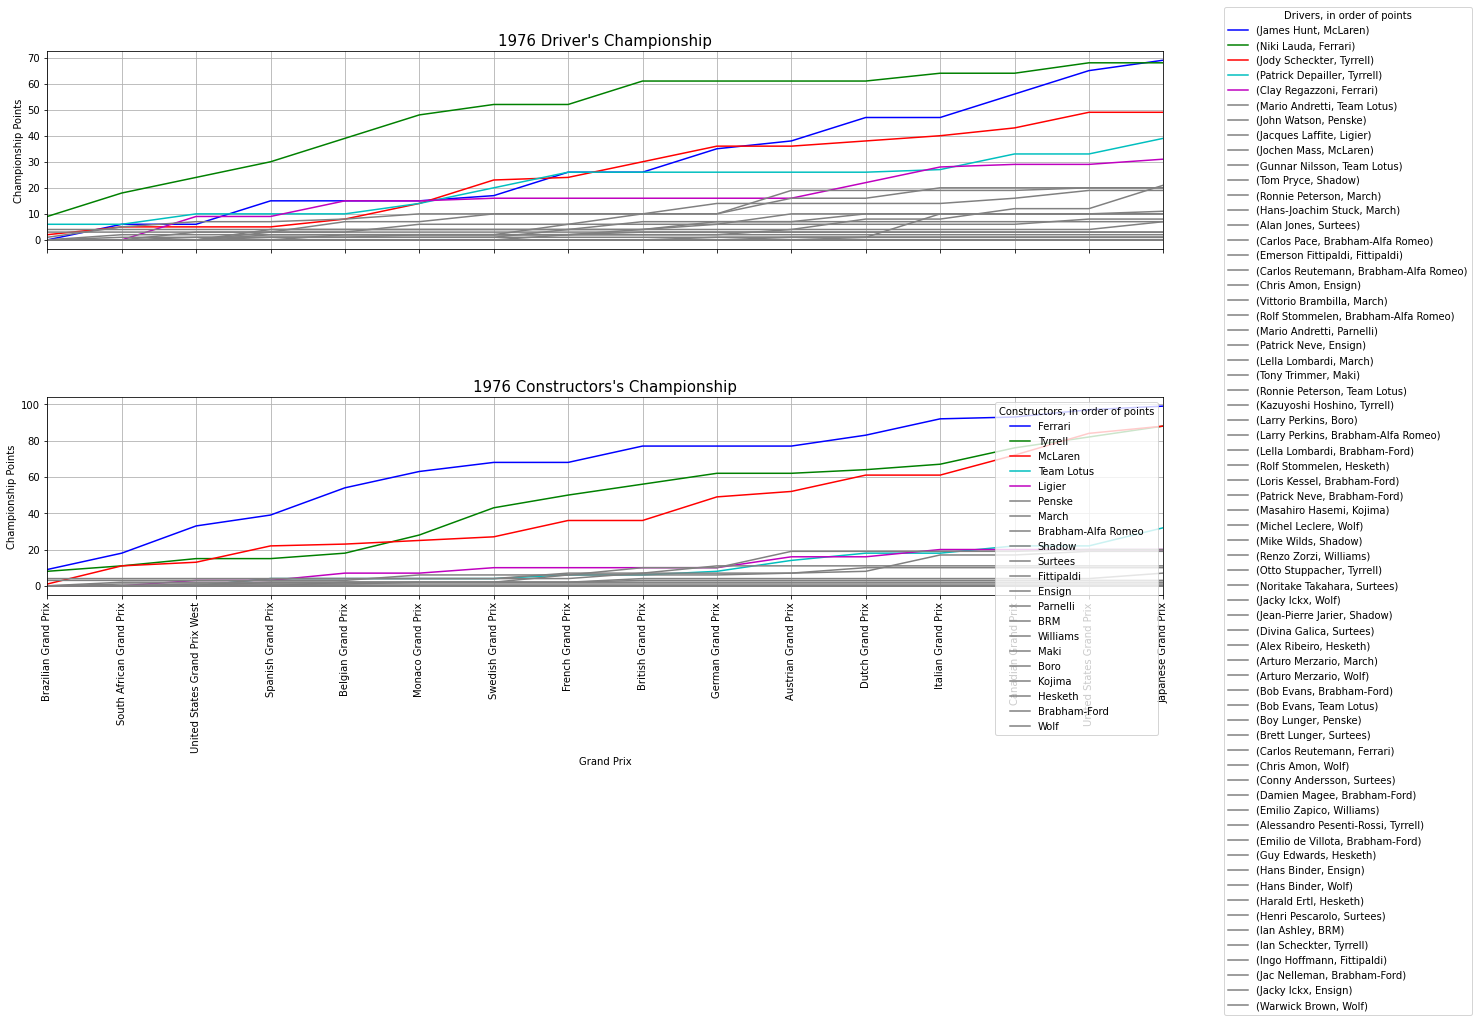

---------------------------------------------------------------
                              1981's Top 5 Season Finishing Points
Driver Name      Constructor                                      
Nelson Piquet    Brabham                                        50
Carlos Reutemann Williams                                       49
Alan Jones       Williams                                       46
Jacques Laffite  Ligier                                         44
Alain Prost      Renault                                        43
             1981's Top 5 Constructors by Points
Constructor                                     
Williams                                      95
Brabham                                       61
Renault                                       54
Ligier                                        44
Ferrari                                       34


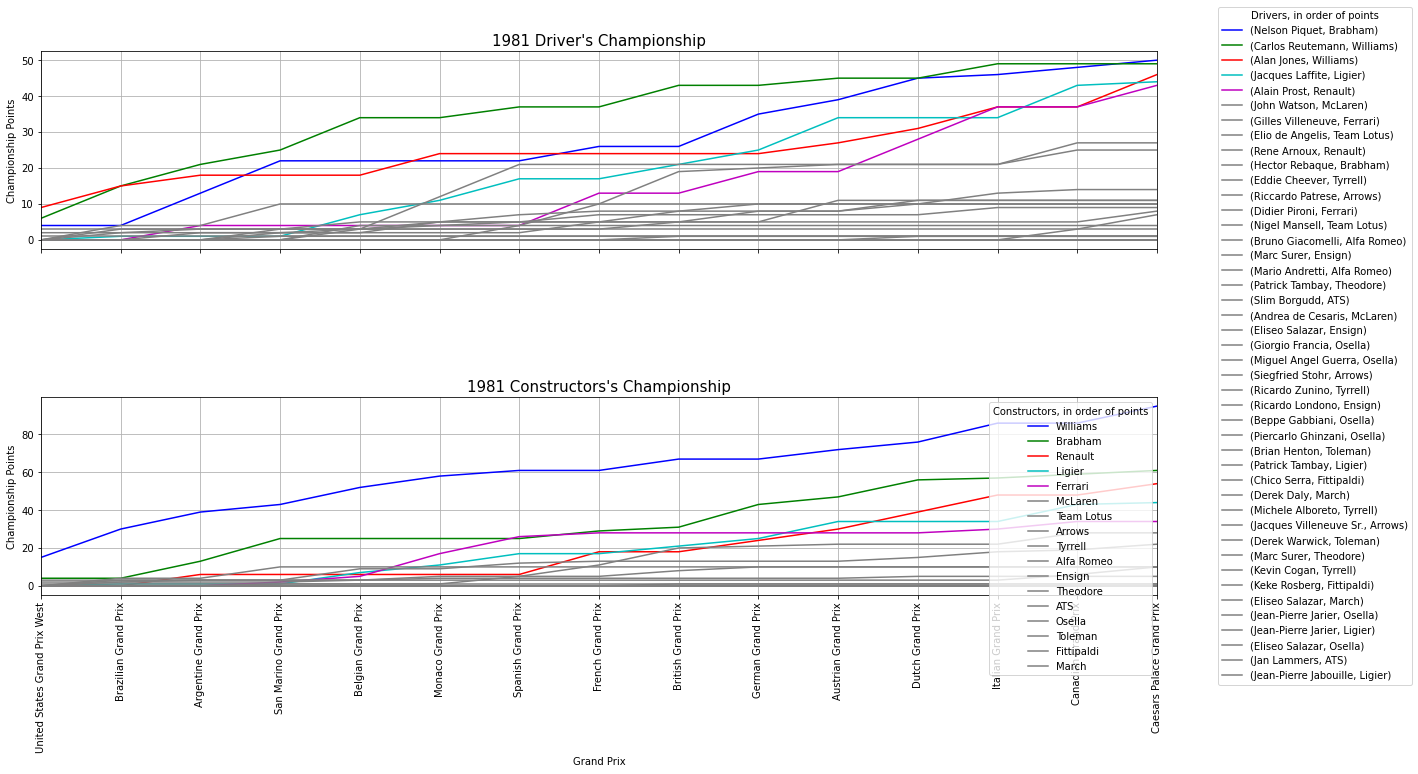

---------------------------------------------------------------
                            1983's Top 5 Season Finishing Points
Driver Name    Constructor                                      
Nelson Piquet  Brabham                                        59
Alain Prost    Renault                                        57
Rene Arnoux    Ferrari                                        49
Patrick Tambay Ferrari                                        40
Keke Rosberg   Williams                                       27
             1983's Top 5 Constructors by Points
Constructor                                     
Ferrari                                       89
Renault                                       79
Brabham                                       72
Williams                                      38
McLaren                                       34


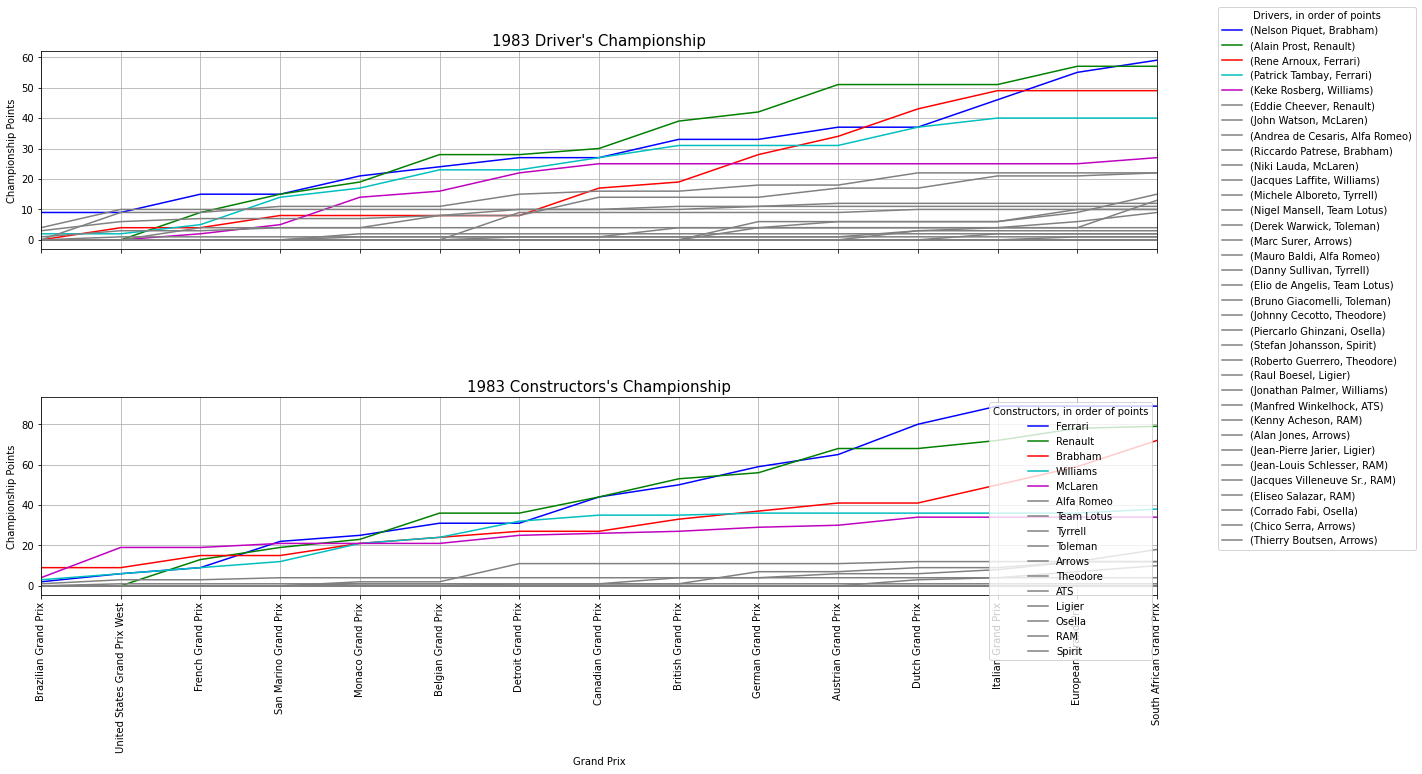

---------------------------------------------------------------
                              1984's Top 5 Season Finishing Points
Driver Name      Constructor                                      
Alain Prost      McLaren                                        72
Niki Lauda       McLaren                                        72
Elio de Angelis  Team Lotus                                     34
Michele Alboreto Ferrari                                        31
Nelson Piquet    Brabham                                        29
             1984's Top 5 Constructors by Points
Constructor                                     
McLaren                                      144
Ferrari                                       58
Team Lotus                                    47
Brabham                                       38
Renault                                       34


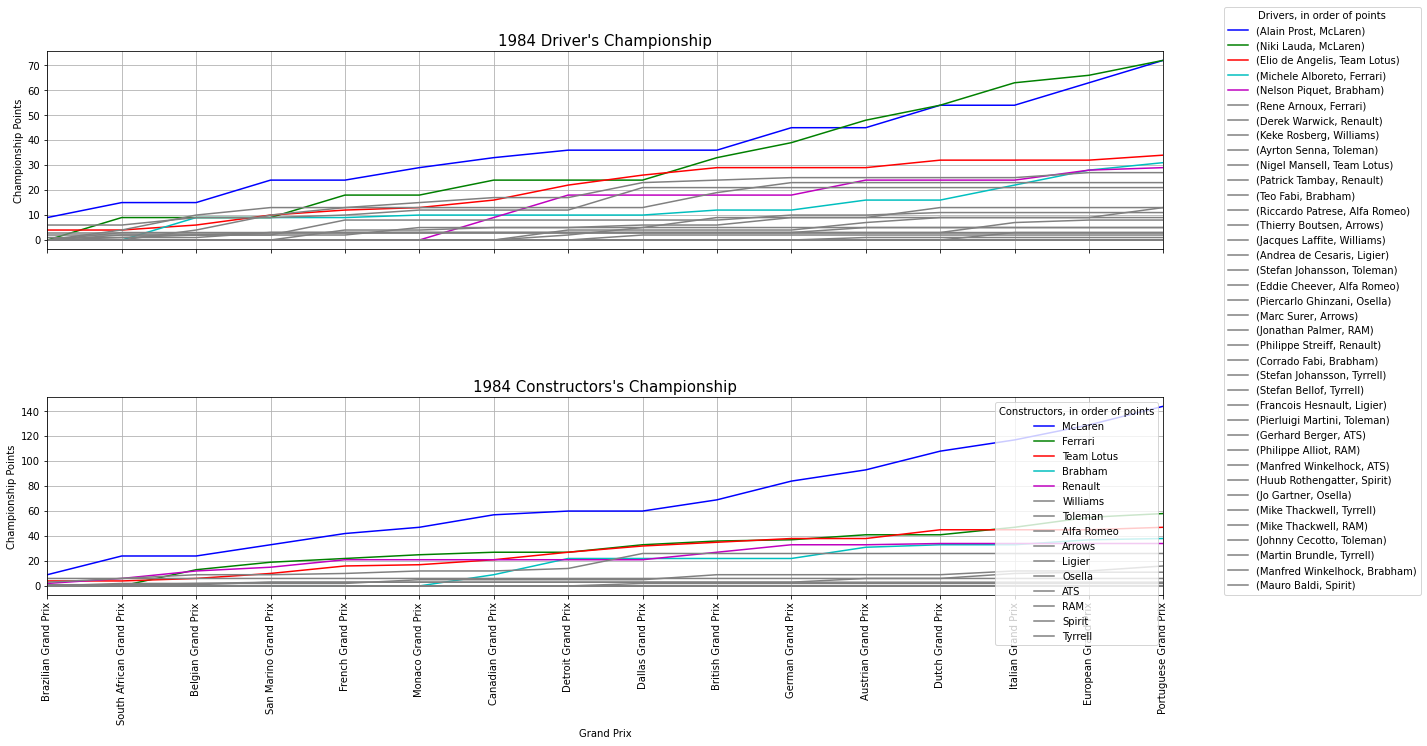

---------------------------------------------------------------
                              1986's Top 5 Season Finishing Points
Driver Name      Constructor                                      
Alain Prost      McLaren                                        74
Nigel Mansell    Williams                                       72
Nelson Piquet    Williams                                       69
Ayrton Senna     Team Lotus                                     55
Stefan Johansson Ferrari                                        23
             1986's Top 5 Constructors by Points
Constructor                                     
Williams                                     141
McLaren                                       96
Team Lotus                                    58
Ferrari                                       37
Ligier                                        29


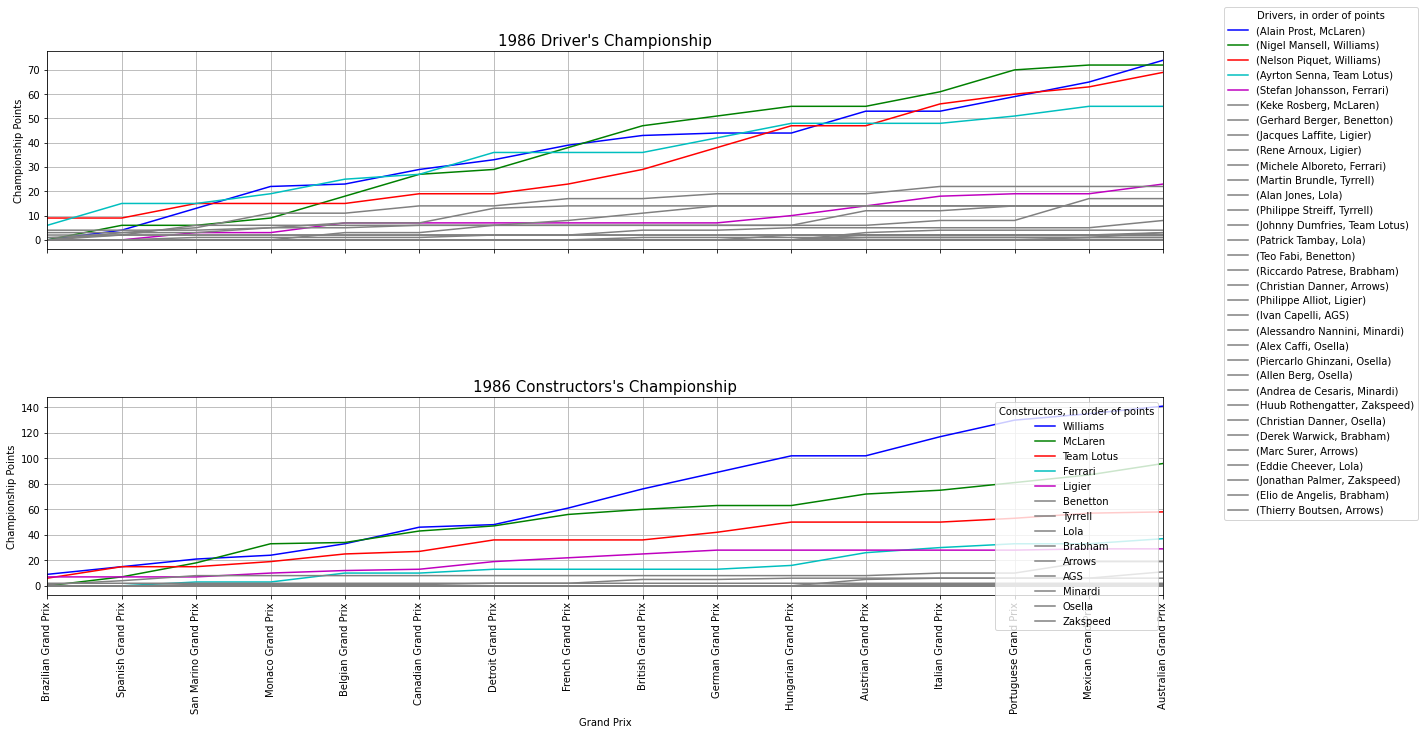

---------------------------------------------------------------
                                1994's Top 5 Season Finishing Points
Driver Name        Constructor                                      
Michael Schumacher Benetton                                       92
Damon Hill         Williams                                       91
Gerhard Berger     Ferrari                                        41
Mika Hakkinen      McLaren                                        26
Jean Alesi         Ferrari                                        24
             1994's Top 5 Constructors by Points
Constructor                                     
Williams                                     118
Benetton                                     103
Ferrari                                       71
McLaren                                       42
Jordan                                        28


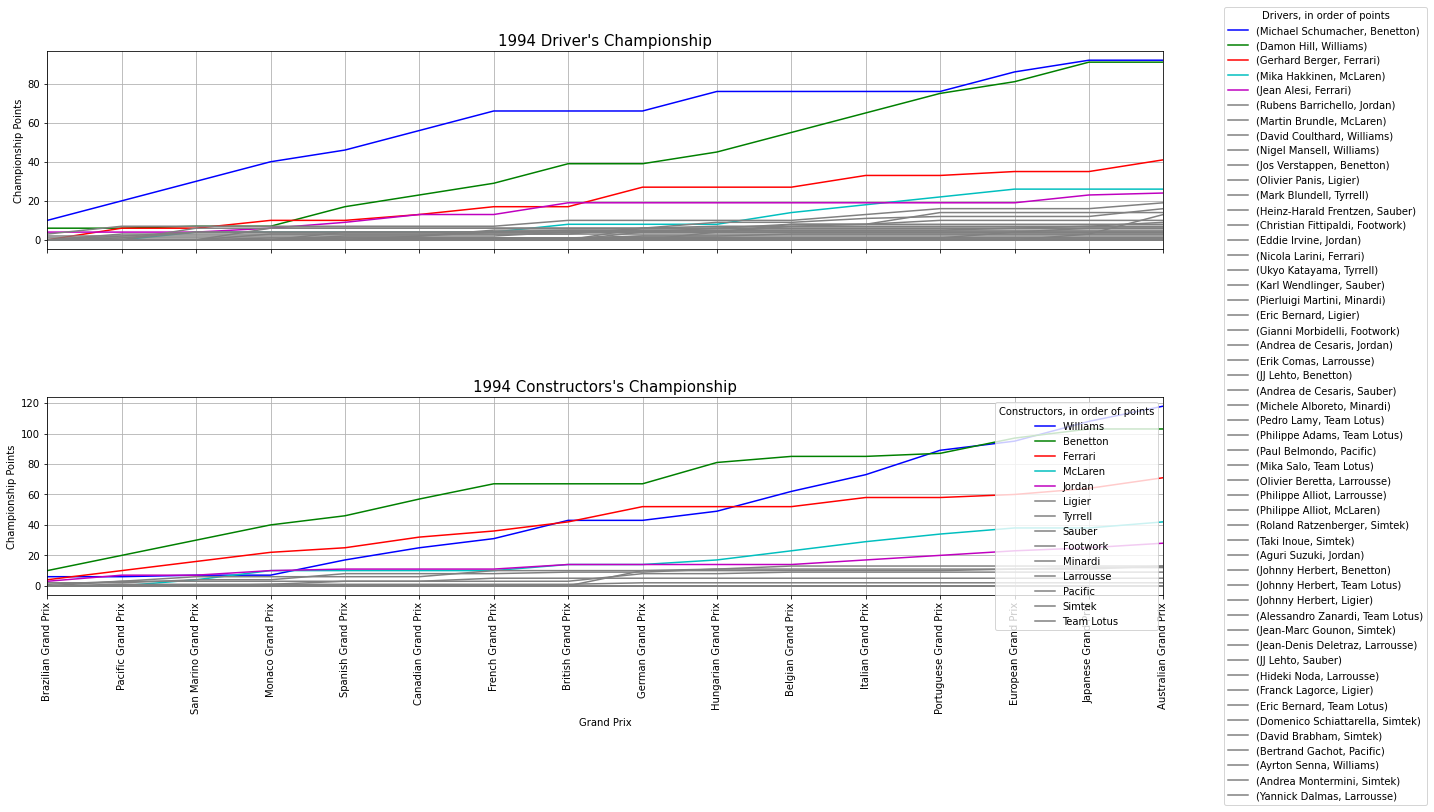

---------------------------------------------------------------
                                   1999's Top 5 Season Finishing Points
Driver Name           Constructor                                      
Mika Hakkinen         McLaren                                        76
Eddie Irvine          Ferrari                                        74
Heinz-Harald Frentzen Jordan                                         54
David Coulthard       McLaren                                        48
Michael Schumacher    Ferrari                                        44
             1999's Top 5 Constructors by Points
Constructor                                     
Ferrari                                      128
McLaren                                      124
Jordan                                        61
Stewart                                       36
Williams                                      35


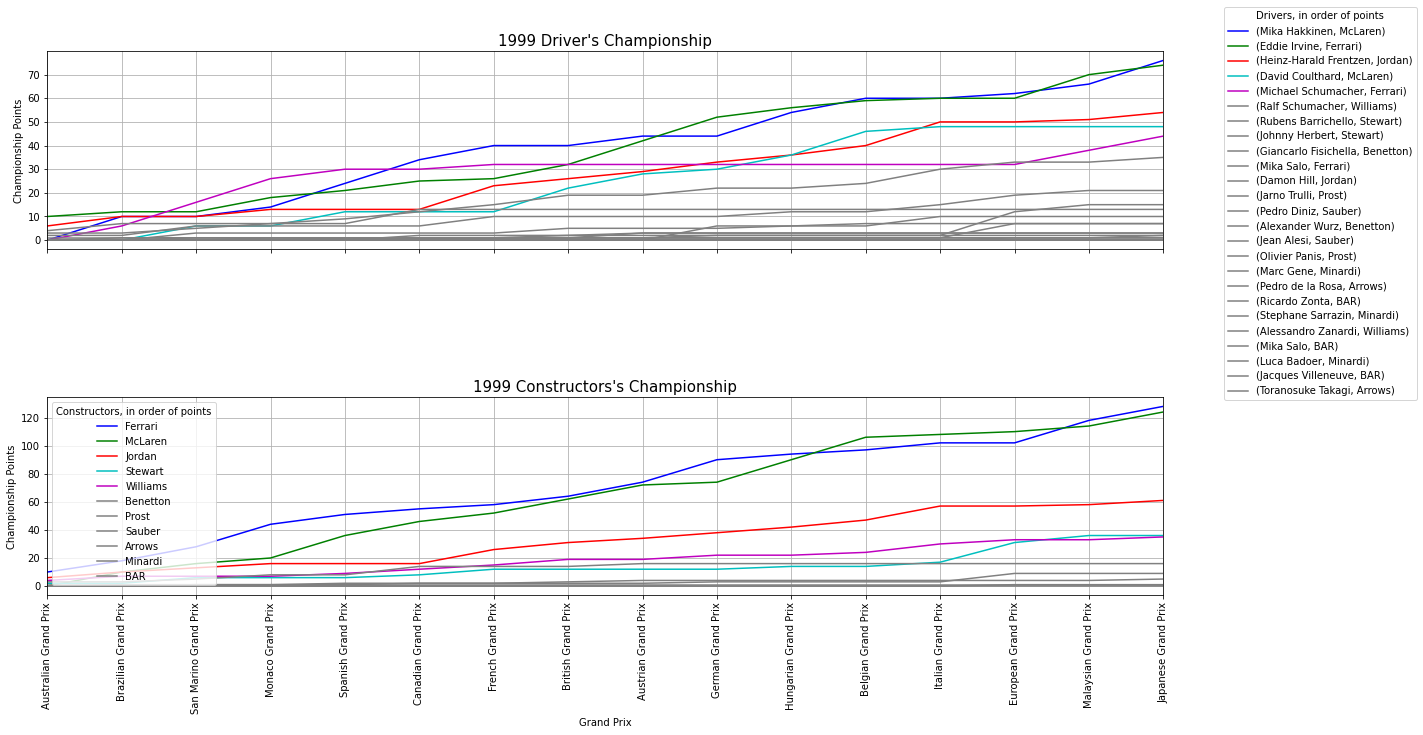

---------------------------------------------------------------
                                2003's Top 5 Season Finishing Points
Driver Name        Constructor                                      
Michael Schumacher Ferrari                                        93
Kimi Raikkonen     McLaren                                        91
Juan Pablo Montoya Williams                                       82
Rubens Barrichello Ferrari                                        65
Ralf Schumacher    Williams                                       58
             2003's Top 5 Constructors by Points
Constructor                                     
Ferrari                                      158
Williams                                     144
McLaren                                      142
Renault                                       88
BAR                                           26


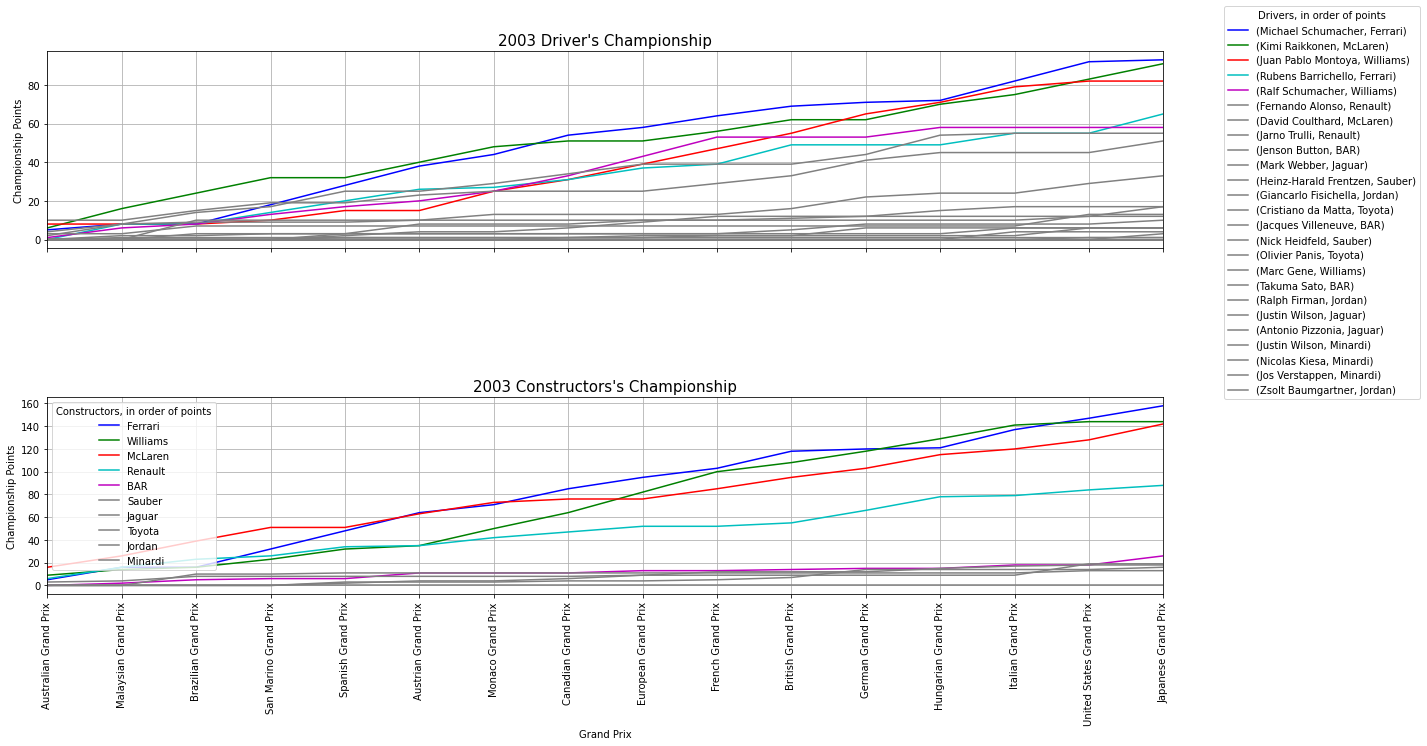

---------------------------------------------------------------
                             2007's Top 5 Season Finishing Points
Driver Name     Constructor                                      
Kimi Raikkonen  Ferrari                                       110
Lewis Hamilton  McLaren                                       109
Fernando Alonso McLaren                                       109
Felipe Massa    Ferrari                                        94
Nick Heidfeld   BMW Sauber                                     61
             2007's Top 5 Constructors by Points
Constructor                                     
McLaren                                      218
Ferrari                                      204
BMW Sauber                                   101
Renault                                       51
Williams                                      33


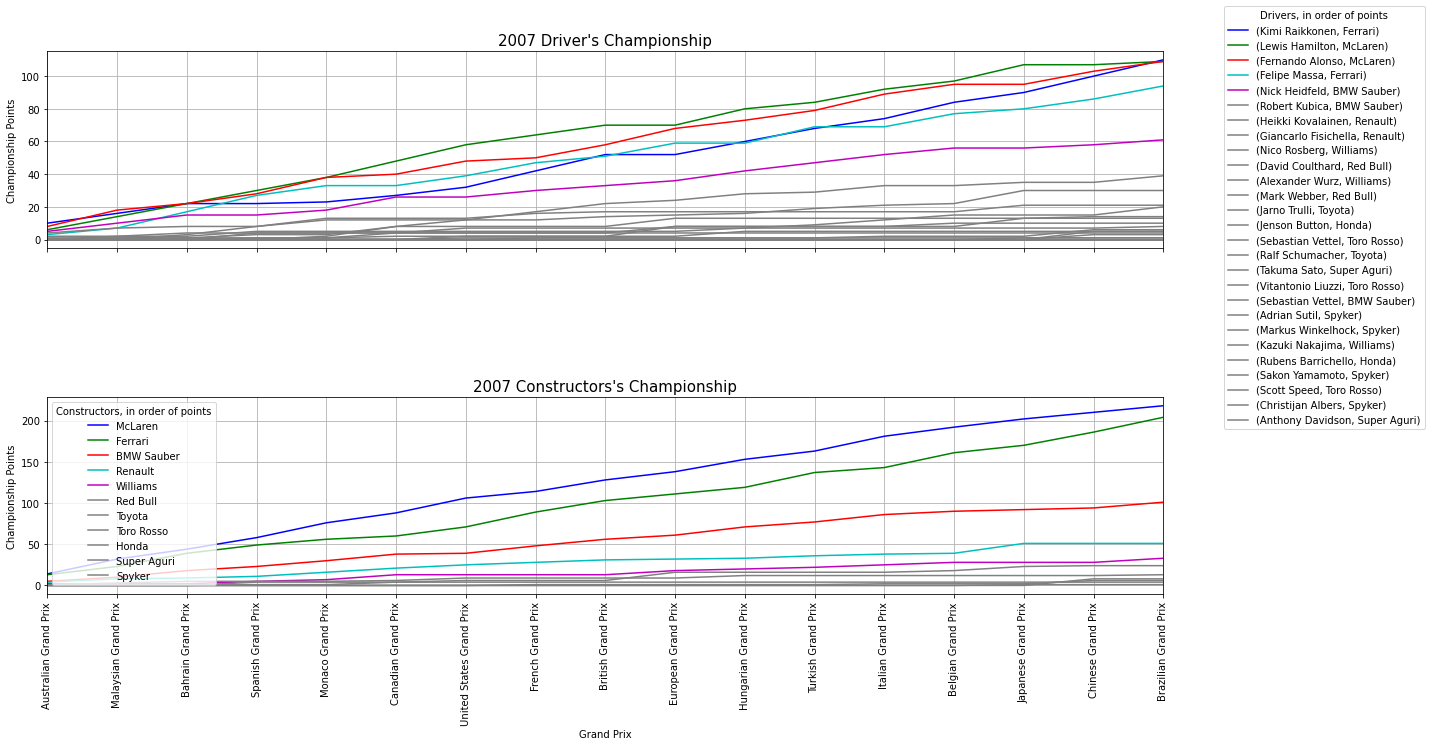

---------------------------------------------------------------
                             2008's Top 5 Season Finishing Points
Driver Name     Constructor                                      
Lewis Hamilton  McLaren                                        98
Felipe Massa    Ferrari                                        97
Kimi Raikkonen  Ferrari                                        75
Robert Kubica   BMW Sauber                                     75
Fernando Alonso Renault                                        61
             2008's Top 5 Constructors by Points
Constructor                                     
Ferrari                                      172
McLaren                                      151
BMW Sauber                                   135
Renault                                       80
Toyota                                        56


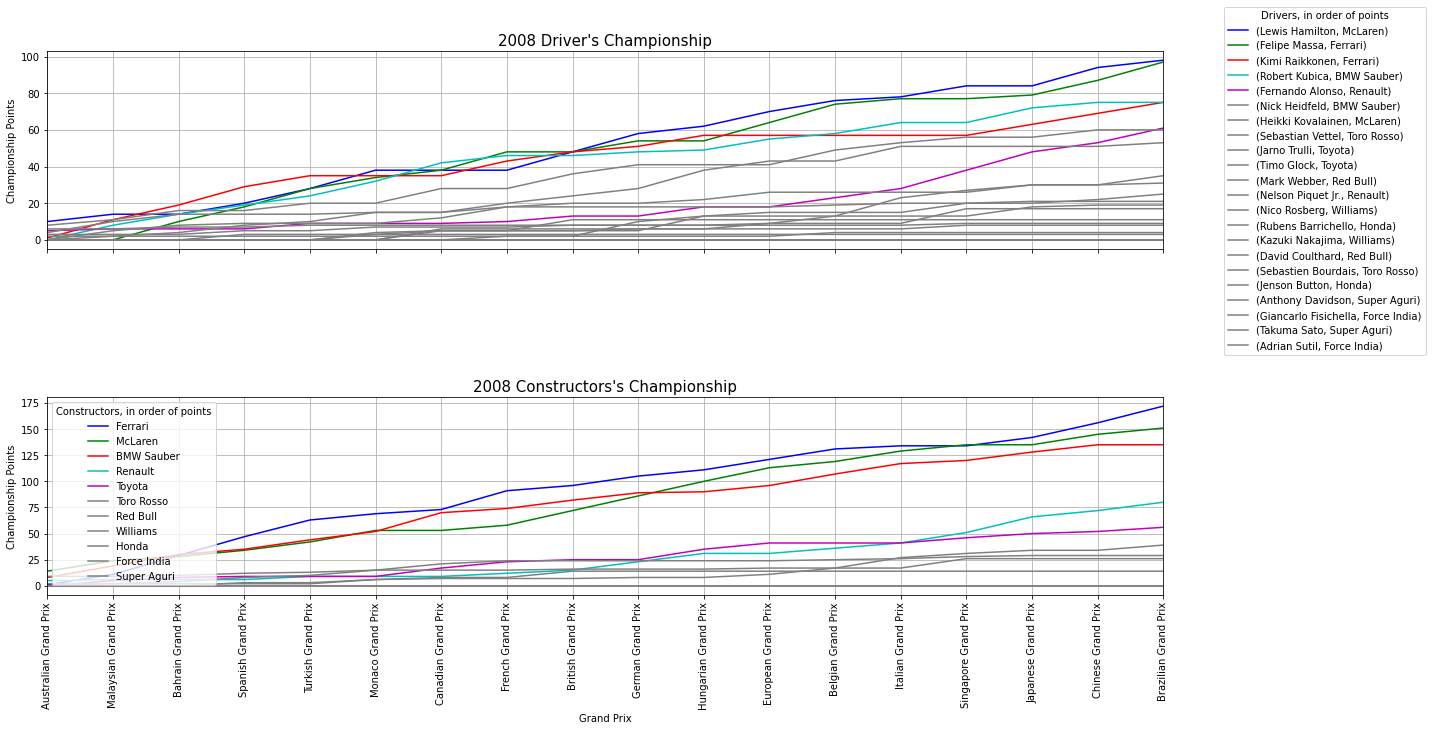

---------------------------------------------------------------


In [7]:
year=[1976, 1981, 1983, 1984, 1986, 1994, 1999, 2003, 2007, 2008]
for year in year:
    Championship(year)
    print('---------------------------------------------------------------')